# Análise exploratória de dados

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import seaborn as sns

In [121]:
colors = ["#87cefa", "#ff0000"]
sns.set_palette(sns.color_palette(colors))

In [122]:
df = sns.load_dataset('diamonds')
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df.shape

(53940, 10)

TEMOS 10 COLUNAS E 53940 LINHAS

## 1. Descrição dos dados

Preço de cerca de 50.000 diamantes lapidados em formato redondo no conjunto de dados temos acesso a :
- Peso, Qualidade do corte , Largura , Comprimento, profundidade, Cor, Medida do quão limpo esta o diamante, Porcentagem total de profundidade e Largura do topo do diamante em relação ao ponto mais largo

## 1.1 Dicionario dos dados

In [118]:
data_path = Path("../data/external/dictionary.csv", index = False)
df_dict = pd.read_csv(data_path, sep=',')

df_dict

,Variavel,Descricao,Tipo,Subtipo:
0,carat,Peso do diamante,Quantitativo,Continua
1,cut,Qualidade do corte,Qualitativo,Ordinal
2,color,Cor do diamante,Qualitativo,Ordinal
3,clarity,Medida do quão limpo esta o diamante,Qualitativo,Ordinal
4,depht,Porcentagem total de profundidade,Quantitativo,Continua
5,table,Largura do topo do diamante em relação ao pont...,Quantitativo,Continua
6,price,Preco do diamante em dolares,Quantitativo,Continua
7,x,Comprimento em mm,Quantitativo,Continua
8,y,largura em mm,Quantitativo,Continua
9,z,profundidade em mm,Quantitativo,Continua


-----------------------------------------------------
- 10 variaveis sendo 3 qualitativas e 7 quantitativas
-----------------------------------------------------

## 2. Perguntas de partida e hipóteses


- Há dados faltantes ? se sim quantos e em quais variaveis ?
- O que faz majoritariamente o preço aumentar ?
- Qual a distribuição dos dados qualitativos ordinais ?

## 2.1 Há dados faltantes ? Se sim quantos e em quais variaveis ?

In [136]:
missing_data = df.isna().sum()
print(missing_data)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Portanto, não há dados faltantes nesse dataset

## 2.2 O que faz majoritariamente o preço aumentar ? 

-Para isso temos que fazer uma relação entre preço e cada variavel


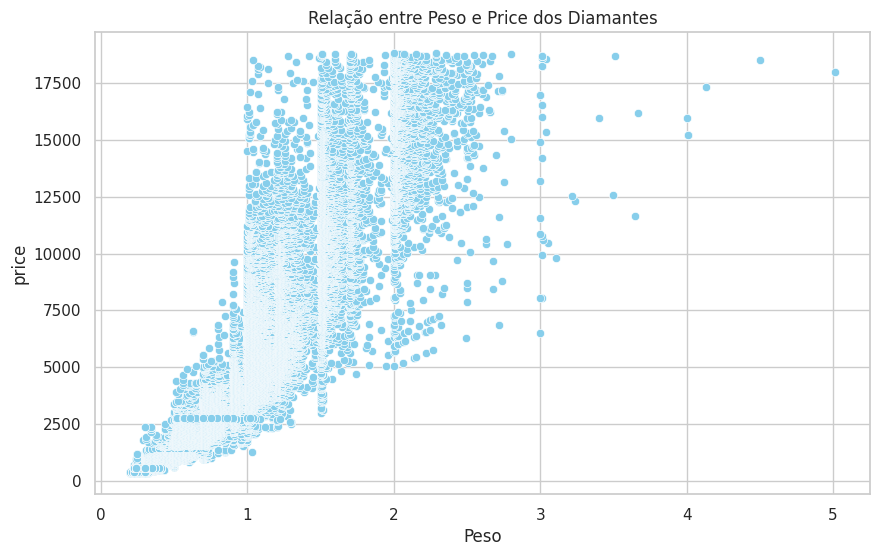

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', color='skyblue')
plt.title('Relação entre Peso e Price dos Diamantes')
plt.xlabel('Peso')
plt.ylabel('price')
plt.show()


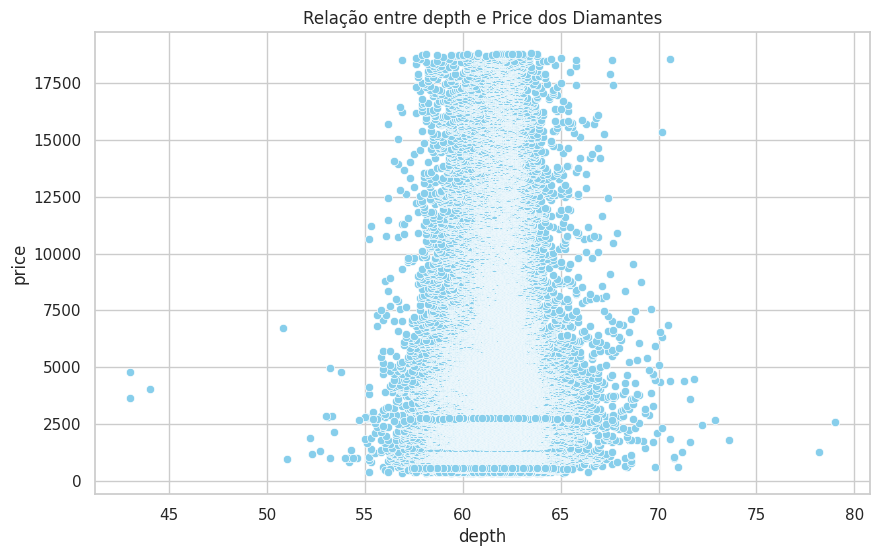

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depth', y='price', color='skyblue')
plt.title('Relação entre depth e Price dos Diamantes')
plt.xlabel('depth')
plt.ylabel('price')
plt.show()

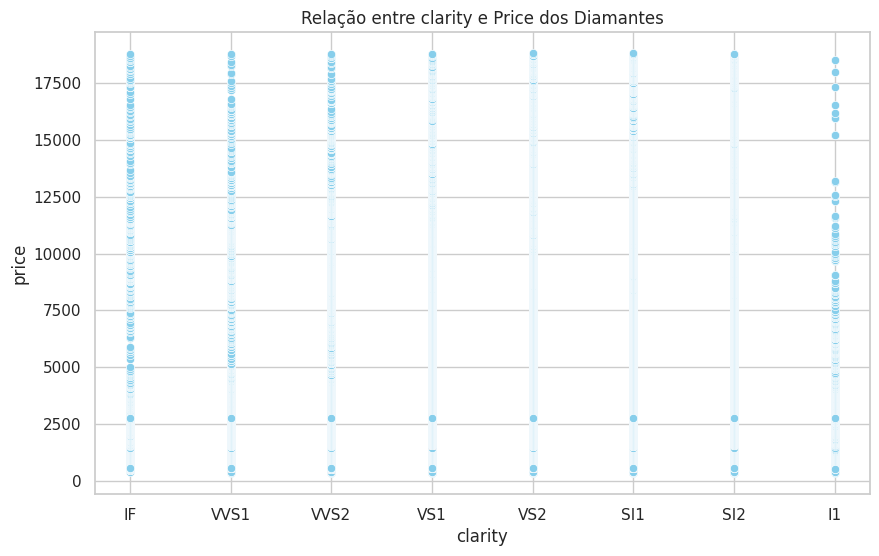

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='clarity', y='price', color='skyblue')
plt.title('Relação entre clarity e Price dos Diamantes')
plt.xlabel('clarity')
plt.ylabel('price')
plt.show()

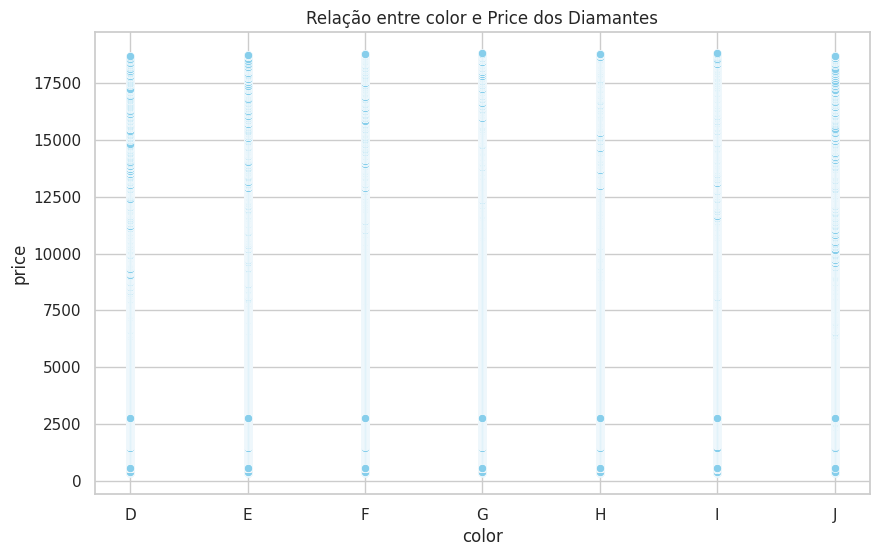

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='color', y='price', color='skyblue')
plt.title('Relação entre color e Price dos Diamantes')
plt.xlabel('color')
plt.ylabel('price')
plt.show()

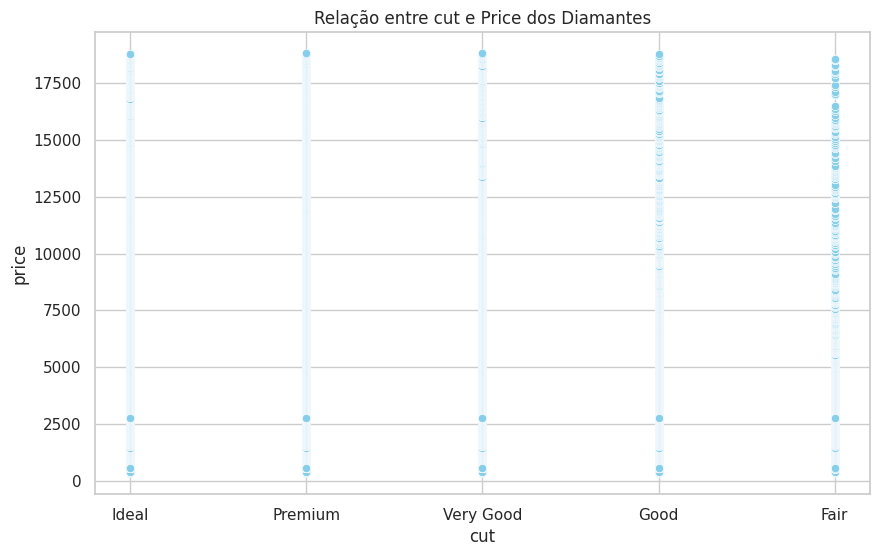

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cut', y='price', color='skyblue')
plt.title('Relação entre cut e Price dos Diamantes')
plt.xlabel('cut')
plt.ylabel('price')
plt.show()

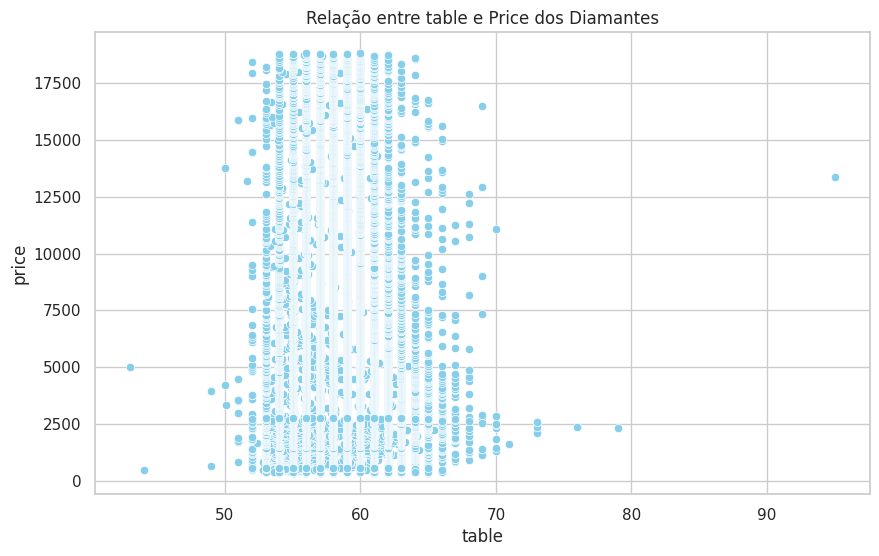

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='table', y='price', color='skyblue')
plt.title('Relação entre table e Price dos Diamantes')
plt.xlabel('table')
plt.ylabel('price')
plt.show()

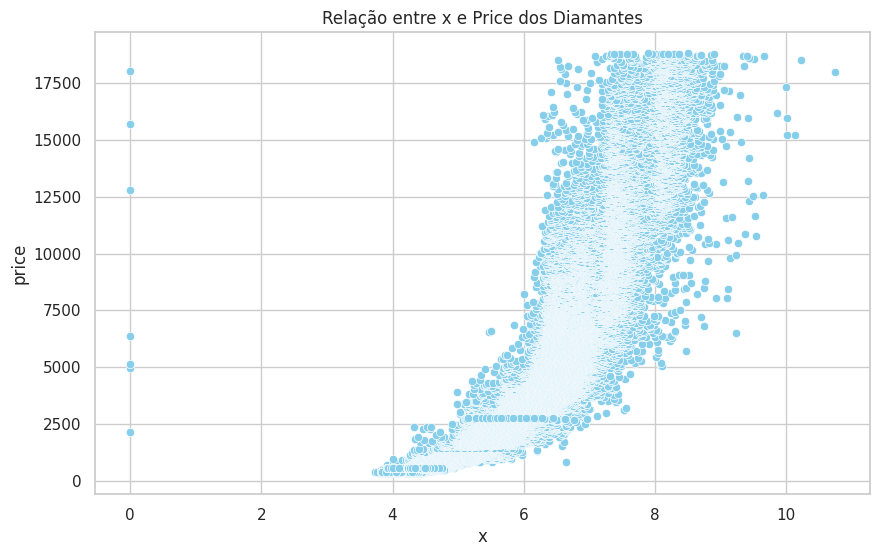

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='price', color='skyblue')
plt.title('Relação entre x e Price dos Diamantes')
plt.xlabel('x')
plt.ylabel('price')
plt.show()

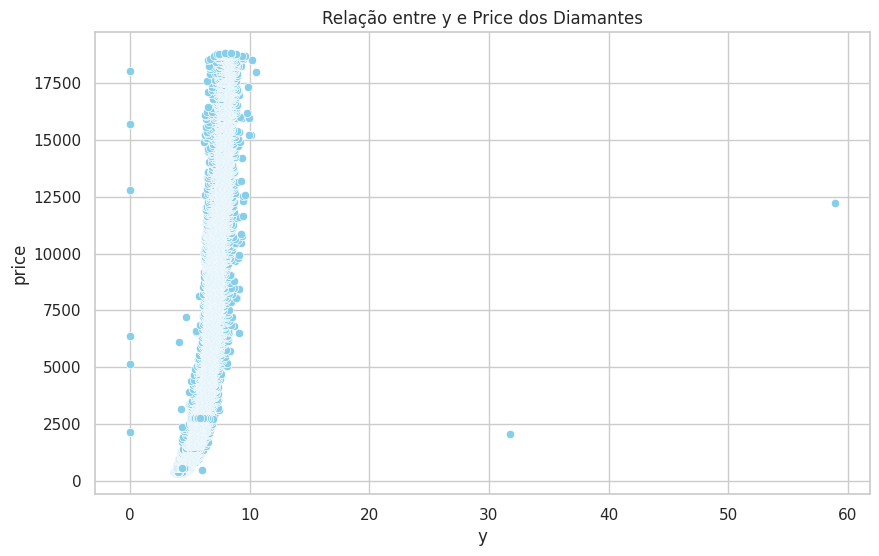

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='y', y='price', color='skyblue')
plt.title('Relação entre y e Price dos Diamantes')
plt.xlabel('y')
plt.ylabel('price')
plt.show()

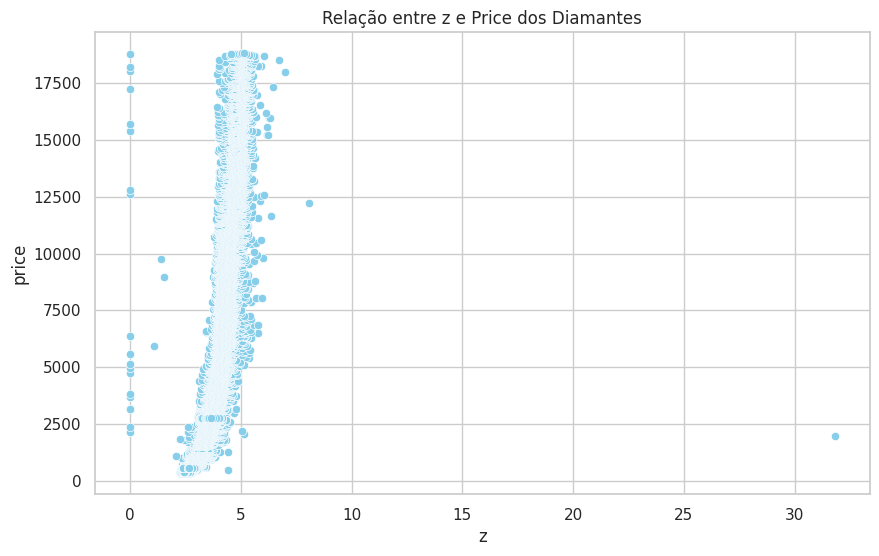

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='z', y='price', color='skyblue')
plt.title('Relação entre z e Price dos Diamantes')
plt.xlabel('z')
plt.ylabel('price')
plt.show()

OBSERVANDO OS GRÁFICOS CHEGUEI A CONCLUSÃO QUE O QUE AUMENTA O PREÇO DO DIAMANTE É UMA COMBINAÇÃO DE FATORES NÃO APENAS UM, PORÉM O QUE DÁ PRA VER QUE É MAIS LEVADO EM CONSIDERAÇÃO COM CERTEZA É O COMPRIMENTO EM MM DO DIAMANTE.

## 2.3 Qual a distribuição dos dados qualitativos ordinais ?

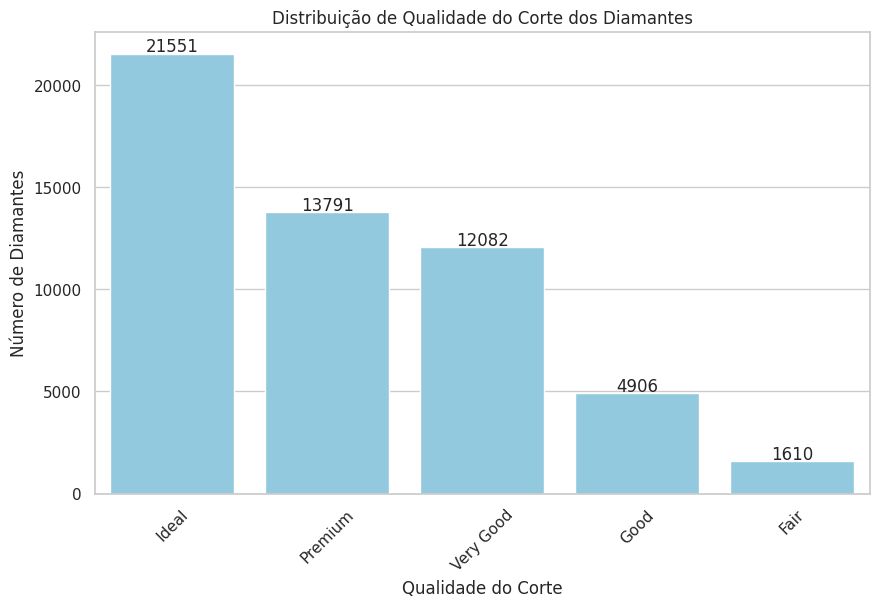

In [154]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='cut', order=df['cut'].value_counts().index, color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribuição de Qualidade do Corte dos Diamantes')
plt.xlabel('Qualidade do Corte')
plt.ylabel('Número de Diamantes')
plt.xticks(rotation=45)
plt.show()

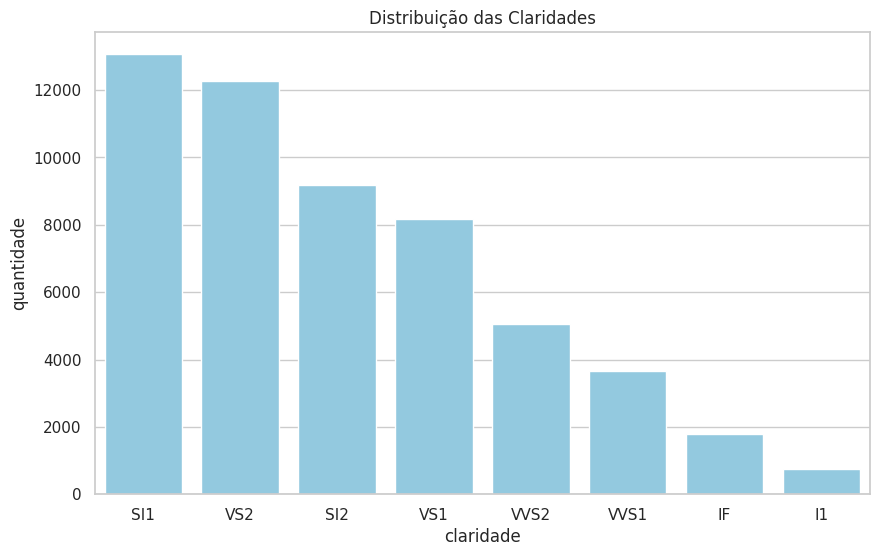

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clarity', order=df['clarity'].value_counts().index, color = 'skyblue')
plt.title('Distribuição das Claridades')
plt.xlabel('claridade')
plt.ylabel('quantidade')
plt.show()

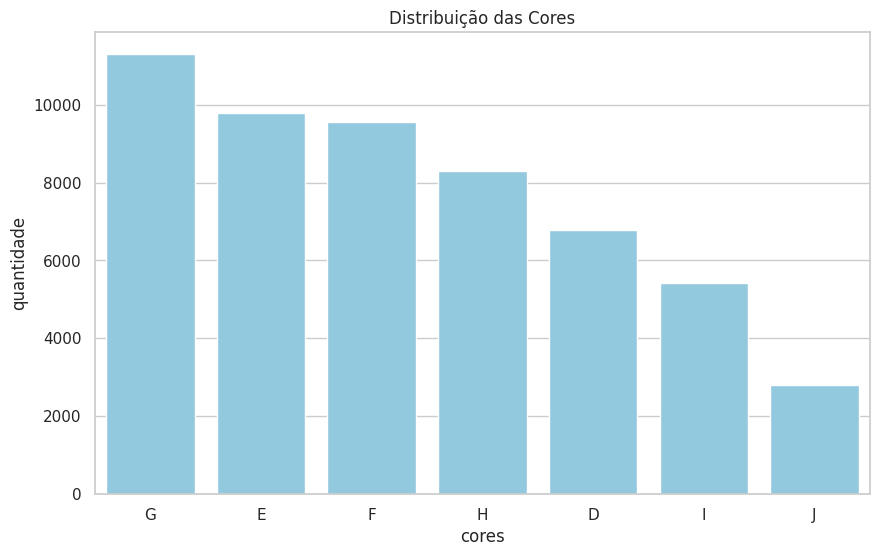

In [156]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='color', order=df['color'].value_counts().index, color = 'skyblue')
plt.title('Distribuição das Cores')
plt.xlabel('cores')
plt.ylabel('quantidade')
plt.show()

- TEMOS NO DATASET MAIS DIAMANTES NA MELHOR QUALIDADE DE CORTE POSSIVEL " IDEAL "
- EM CORES A ORDEM SERIA DE MELHOR PRA PIOR É " DEFGJHIJ " PORTANTO A QUARTA MELHOR COR LIDERA EM QUANTIDADE
- EM CLARIDADE A ORDEM SERIA DE MELHOR PRA PIOR " IF,VVS1,VVS2,VS1,VS2,SI1,SI2,LI " PORTANTO A TERCEIRA PIOR COR LIDERA EM QUANTIDADE

## 3. Insights

COM A AJUDA DOS GRÁFICOS CRIADOS CHEGUEI A ALGUMAS CONCLUSÕES :
- A MAIORIA DOS DIAMANTES PESA ENTRE 1 A 2 KG
- A MAIORIA DOS CORTES SÃO IDEAIS E A GRANDE MINORIA SÃO 'FAIR'
- O COMPRIMENTO DO DIAMANTE É MUITO IMPORTANTE PARA ATRIBUIR VALOR 
- A LARGURA E A PROFUNDIDADE DOS DIAMANTES SOFREM POUCA VARIAÇÃO EM COMPARAÇÃO COM O COMPRIMENTO
- O QUE MAIS ATRIBUI VALOR AO DIAMANTE É O CONJUNTO DE FATORES E NÃO APENAS UM ISOLADO